In [1]:

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import os
import jax.numpy as jnp
from jax import vmap
from itertools import repeat
from decimal import Decimal


In [2]:

#Loading and ordering PR4 FITS files
path = '/Users/willhoffman/Desktop/CMB/PR4/Frequency Maps/Single-Frequency/Fits'
FITS = os.listdir(path)

def freq(string):
    return string[11:14]
FITS.sort(key=freq,reverse=True)
print(FITS)


['HFI_SkyMap_857-BPassCorrected_2048_R4.00_full.fits', 'HFI_SkyMap_545-BPassCorrected_2048_R4.00_full.fits', 'HFI_SkyMap_353-BPassCorrected_2048_R4.00_full.fits', 'HFI_SkyMap_217-BPassCorrected_2048_R4.00_full.fits', 'HFI_SkyMap_143-BPassCorrected_2048_R4.00_full.fits', 'HFI_SkyMap_100-BPassCorrected_2048_R4.00_full.fits', 'LFI_SkyMap_070-BPassCorrected_1024_R4.00_full.fits', 'LFI_SkyMap_044-BPassCorrected_1024_R4.00_full.fits', 'LFI_SkyMap_030-BPassCorrected_1024_R4.00_full.fits', '.DS_Store']


In [3]:

#Retrieving Dipole Data
pathd = '/Users/willhoffman/Desktop/CMB/PR4/Dipole/Fits/dipole_CMB_n2048_K.fits'
fileDi = fits.open(pathd)
Dipole = np.concatenate(fileDi[1].data['T'])


In [5]:

nside = 1024 # magic

def extractData(f,nside = 1024,Dipole=Dipole):
    if f != '.DS_Store':
        mapName = f[11:14] + 'GHz'
        
        #Taking Data off FITS
        file = fits.open(os.path.join(path,f))
        Data = hp.reorder(np.concatenate(file[1].data['I_STOKES']),n2r=True)
        
        #Removing Dipole, 10 arcmin smoothing
        #getting everything to nside=1024
        Data = hp.map2alm(Data,ellMax)
        Dipole = hp.map2alm(Dipole,ellMax)
        Data = hp.alm2map(Data,nside)
        Dipole = hp.alm2map(Dipole,nside)
        Data -= Dipole
    
        return {"name": mapName, "nside":nside, "data": jnp.array(Data)}

Maps = list(map(extractData,FITS))
Maps.remove(None)

print(Maps)


[{'name': '857GHz', 'nside': 1024, 'data': Array([-0.45613602, -0.48390862, -0.48086756, ..., -0.45624238,
       -0.28956318, -0.2976368 ], dtype=float32)}, {'name': '545GHz', 'nside': 1024, 'data': Array([-0.00218432, -0.0023081 , -0.00225497, ..., -0.00118961,
        0.00034908, -0.00050551], dtype=float32)}, {'name': '353GHz', 'nside': 1024, 'data': Array([0.00045249, 0.00047329, 0.00045781, ..., 0.00070366, 0.00078225,
       0.00069993], dtype=float32)}, {'name': '217GHz', 'nside': 1024, 'data': Array([-3.0715967e-04, -2.3614931e-04, -2.0234512e-04, ...,
       -4.8339665e-05, -3.4665365e-05, -5.1443112e-05], dtype=float32)}, {'name': '143GHz', 'nside': 1024, 'data': Array([-2.1523891e-04, -1.6231024e-04, -1.3821002e-04, ...,
        2.3003509e-05,  2.3883340e-05,  9.3173448e-06], dtype=float32)}, {'name': '100GHz', 'nside': 1024, 'data': Array([-1.76237299e-04, -1.51738976e-04, -1.10906054e-04, ...,
        8.57359009e-06,  1.95910034e-05,  9.49390596e-06], dtype=float32)}, {'n

In [6]:

N = len(Maps)
M = len(Maps[0]['data'])


In [13]:

def Plot():
    fig, ax = plt.subplots(N,figsize=(25,40))

    bound = 0.001

    for n in range(N):
        plt.axes(ax[n])
        hp.mollview(Maps[n]['data'],min=-bound,max=bound,norm='hist',flip='astro',cmap='Spectral_r',hold=True)
        title = Maps[n]['name'] + ' data'
        plt.title(title)

    plt.show()


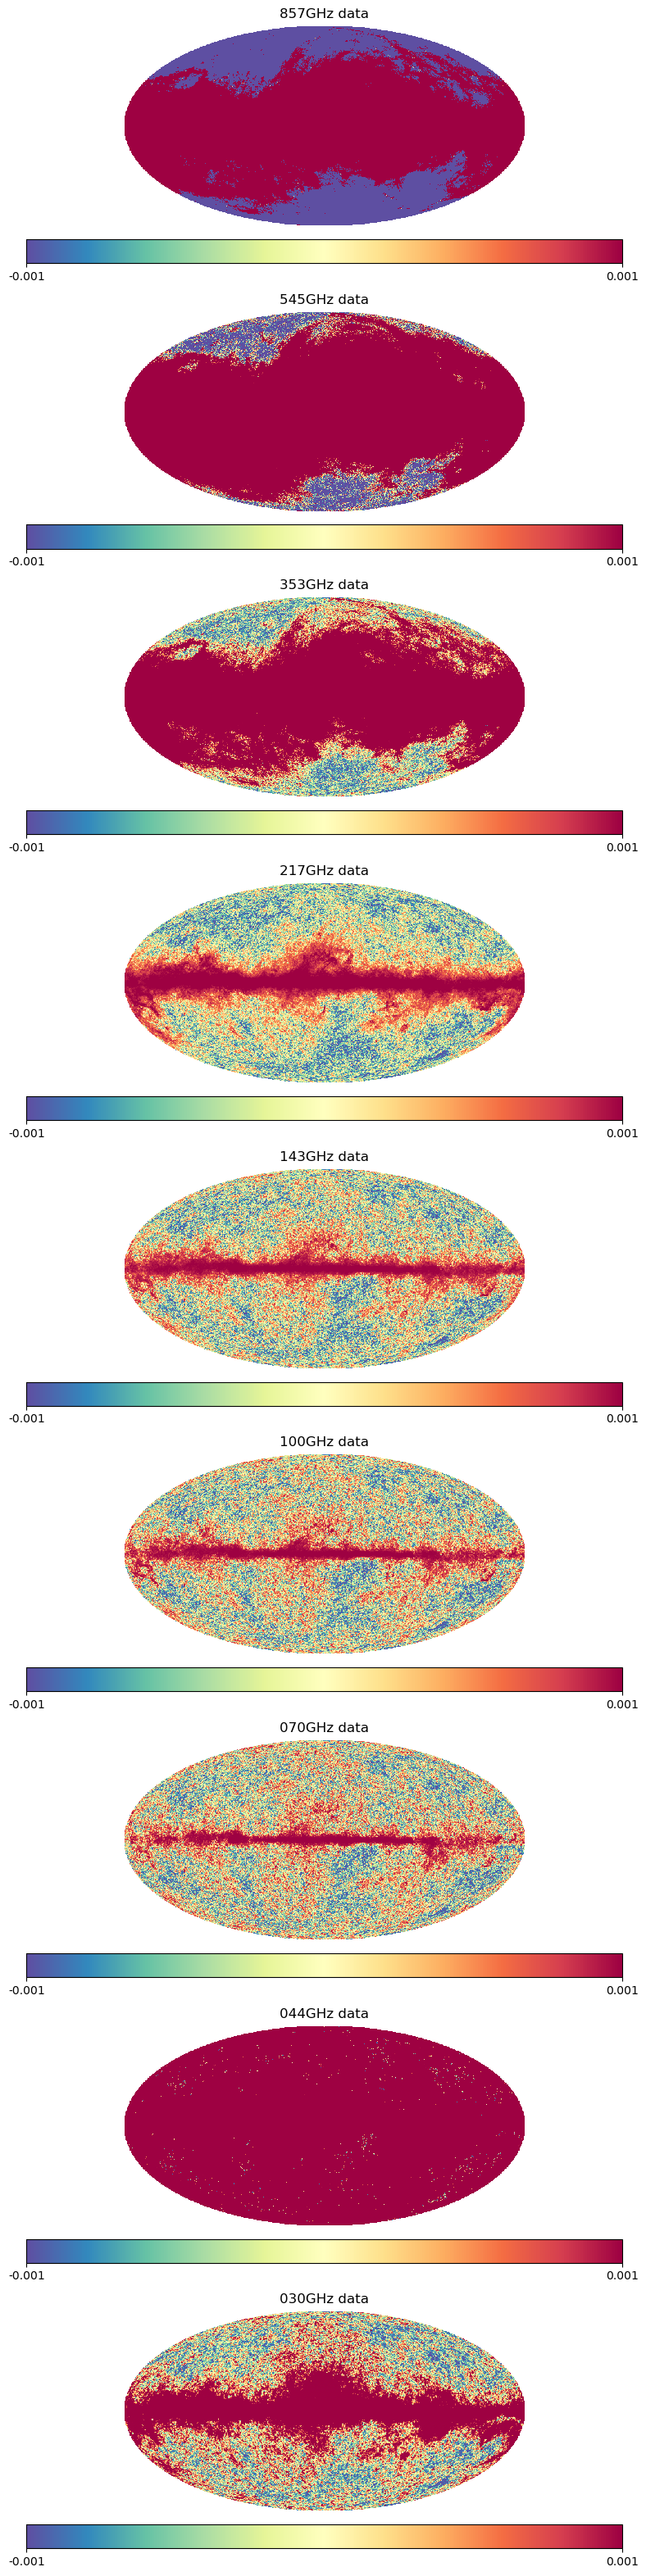

In [14]:

Plot()
